In [79]:
from skimage import io
import cv2
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot as plt
import warnings
import numpy as np

## 输入图片

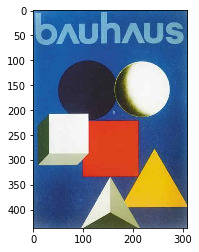

In [80]:
# 导入图片,并显示
img_path = 'poster.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [81]:
# hsv to rgb 转换，显示出来，并转换为十六进制颜色码，供设计师查看
def hsv_to_rgb(hsv=[]):
    img_hsv=np.array([[hsv]],np.uint8)
    img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    plt.imshow(img_rgb)
    plt.show()
    
    #转换十六进制颜色代码
    color_str = '#'
    for rgb_value in img_rgb[0][0]:
        num = round(rgb_value.tolist()) # 四舍五入取整
        # 将R、G、B分别转化为16进制拼接转换并大写
        color_str += str(hex(num))[-2:].replace('x', '0').upper()
    print(color_str)
    
    return color_str

## 聚类获得主要颜色，并输出作为配色方案

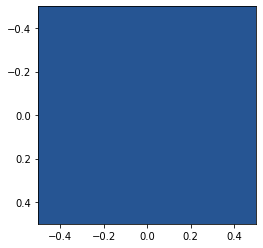

#265593


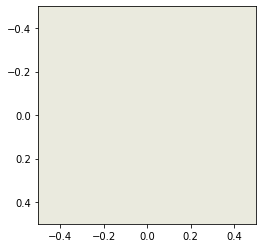

#EAEADE


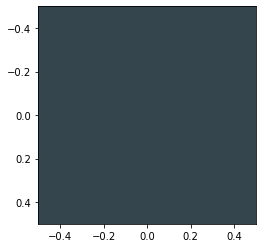

#35454E


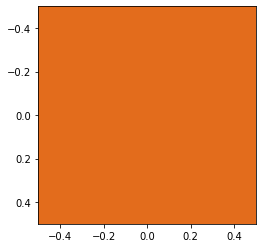

#E36C1C


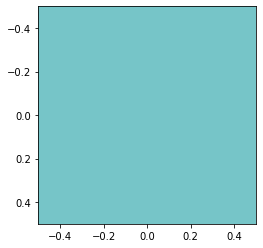

#76C5C8


In [82]:
# 通过K-means聚类，获得主要颜色的HSV值，并显示出来

def primaryColors(img_file):

    # k-means中的k值，即选择几个中心点
    k = 5

    # 读图片
    img = cv2.cvtColor(img_file, cv2.COLOR_RGB2HSV)

    # 转换数据维度
    img_ori_shape = img.shape
    img1 = img.reshape((img_ori_shape[0] * img_ori_shape[1], img_ori_shape[2]))

    # 聚类
    estimator = MiniBatchKMeans(n_clusters=k, max_iter=400, init='k-means++', n_init=50)  # 构造聚类器
    estimator.fit(img1)  # 聚类
    centroids = estimator.cluster_centers_.tolist() # 获取聚类中心, 三个坐标分别对应H，S，V三个通道, 并将ndarray转化为list

    for centroid in centroids:  
        # print(centroid)
        hsv_to_rgb(centroid)
    return

primaryColors(img)